In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/imd_gridded/Rainfall_ind1999_rfp25.grd

/content/drive/MyDrive/imd_gridded/Rainfall_ind1999_rfp25.grd


In [ ]:
from datetime import datetime, timedelta
import pandas as pd
import xarray as xr

In [ ]:
import numpy as np
import os

# Set parameters
ISIZ = 135
JSIZ = 129

# Initialize array
RF = np.empty((365, ISIZ, JSIZ))

# Open the file
filename = r'/content/drive/MyDrive/imd_gridded/Rainfall_ind1999_rfp25.grd'
if os.path.exists(filename):
    with open(filename, 'rb') as f:
        # Set number of days
        NDAY = 365
        for IDAY in range(NDAY):
            # Read data into RF array
            for J in range(JSIZ):
                for I in range(ISIZ):
                    # Read binary data and store as 32-bit float
                    RF[IDAY, I, J] = np.fromfile(f, dtype=np.float32, count=1)
else:
    print(f"File {filename} does not exist.")

In [ ]:
RF[RF==-999] = np.nan

In [ ]:
lons = np.zeros(135, dtype=float)
lats = np.zeros(129, dtype=float)
for j in range(135):
    lons[j] = 66.5 + j * 0.25
for j in range(129):
    lats[j] = 6.5 + j * 0.25
base_time = datetime(1999, 1, 1)
times = pd.date_range(start='1999-01-01', end='1999-12-31')

In [ ]:
ds = xr.Dataset({
    'rf': xr.DataArray(
                data   = RF,   # enter data here
                dims   = ['time', 'lon', 'lat'],
                coords = {'time': times, 'lon': lons, 'lat': lats},
                ),
            },
    )
ds_transposed = ds.transpose('time', 'lat', 'lon')

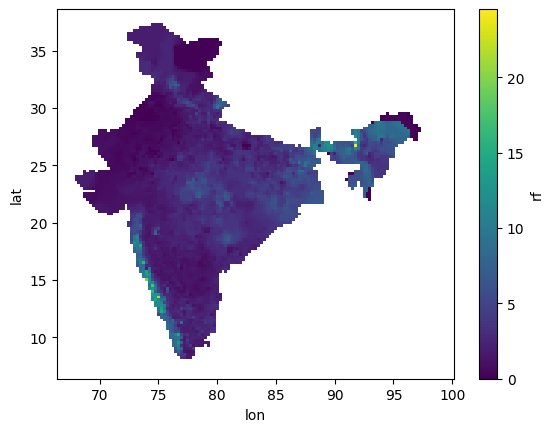

In [ ]:
ds_transposed.rf.mean(dim='time').plot()

In [ ]:
import calendar

year = 2020
if calendar.isleap(year):
    print(f"{year} is a leap year.")
else:
    print(f"{year} is not a leap year.")

2020 is a leap year.


# Generate for all years

In [ ]:
def imd_xarray(year):
    # Set parameters
        ISIZ = 135
        JSIZ = 129
        if calendar.isleap(year):
            ndays = 366
        else:
            ndays = 365
        RF = np.empty((ndays, ISIZ, JSIZ))

        # Open the file
        filename = r'/content/drive/MyDrive/imd_gridded/Rainfall_ind'+str(year)+'_rfp25.grd'
        print(filename)
        if os.path.exists(filename):
            with open(filename, 'rb') as f:
                # Set number of days
                NDAY = 365
                for IDAY in range(NDAY):
                    # Read data into RF array
                    for J in range(JSIZ):
                        for I in range(ISIZ):
                            # Read binary data and store as 32-bit float
                            RF[IDAY, I, J] = np.fromfile(f, dtype=np.float32, count=1)
        else:
            print(f"File {filename} does not exist.")
        RF[RF==-999] = np.nan
        lons = np.zeros(135, dtype=float)
        lats = np.zeros(129, dtype=float)
        for j in range(135):
            lons[j] = 66.5 + j * 0.25
        for j in range(129):
            lats[j] = 6.5 + j * 0.25
        base_time = datetime(1999, 1, 1)
        times = pd.date_range(start=str(year)+'-01-01', end=str(year)+'-12-31')
        ds = xr.Dataset({
            'rf': xr.DataArray(
                        data   = RF,   # enter data here
                        dims   = ['time', 'lon', 'lat'],
                        coords = {'time': times, 'lon': lons, 'lat': lats},
                        ),
                    },
            )
        ds_transposed = ds.transpose('time', 'lat', 'lon')
        ds_transposed.to_netcdf('imd_rf_'+str(year)+'.nc')

In [ ]:
for year_ in range(1982,2023):
    imd_xarray(year_)

/content/drive/MyDrive/imd_gridded/Rainfall_ind1982_rfp25.grd


KeyboardInterrupt: ignored

In [ ]:
!cp imd_rf_*.nc /content/drive/MyDrive/imd_gridded/.

In [ ]:
!ls

In [ ]:
!ls /content/drive/MyDrive/imd_gridded/

In [ ]:
ds = xr.open_dataset('/content/drive/MyDrive/imd_gridded/imd_rf_2022.nc')

In [ ]:
ds

In [ ]:
ds.rf.mean(dim='time').plot()

In [ ]:
!ls /content/drive/MyDrive/imd_gridded/Homogeneous_Monsoon_Regions_Shapefiles/SHAPEFILES_COPY

Central_Northeast.dbf  Northeast.dbf	     South_Peninsular.prj
Central_Northeast.prj  Northeast.prj	     South_Peninsular.qpj
Central_Northeast.qpj  Northeast.qpj	     South_Peninsular.shp
Central_Northeast.shp  Northeast.shp	     South_Peninsular.shx
Central_Northeast.shx  Northeast.shx	     West_Central.cpg
Hilly_Regions.dbf      Northwest.dbf	     West_Central.dbf
Hilly_Regions.prj      Northwest.prj	     West_Central.prj
Hilly_Regions.qpj      Northwest.qpj	     West_Central.qpj
Hilly_Regions.shp      Northwest.shp	     West_Central.shp
Hilly_Regions.shx      Northwest.shx	     West_Central.shx
Image.png	       South_Peninsular.dbf


In [ ]:
!cp /content/drive/MyDrive/imd_gridded/Homogeneous_Monsoon_Regions_Shapefiles/SHAPEFILES_COPY/* .

In [ ]:
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install --upgrade geopandas
!pip install --upgrade rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 101.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 83.4 MB/s eta 0:00:00


In [ ]:
!pip install rioxarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 4.2 MB/s eta 0:00:00


In [ ]:
!cp /content/drive/MyDrive/imd_gridded/imd_rf_*.nc .
!ls

Central_Northeast.dbf	 imd_rf_1988.nc  imd_rf_2008.nc  Northwest.dbf
Central_Northeast.prj	 imd_rf_1989.nc  imd_rf_2009.nc  Northwest.prj
Central_Northeast.qpj	 imd_rf_1990.nc  imd_rf_2010.nc  Northwest.qpj
Central_Northeast.shp	 imd_rf_1991.nc  imd_rf_2011.nc  Northwest.shp
Central_Northeast.shx	 imd_rf_1992.nc  imd_rf_2012.nc  Northwest.shx
drive			 imd_rf_1993.nc  imd_rf_2013.nc  sample_data
Hilly_Regions.dbf	 imd_rf_1994.nc  imd_rf_2014.nc  South_Peninsular.dbf
Hilly_Regions.prj	 imd_rf_1995.nc  imd_rf_2015.nc  South_Peninsular.prj
Hilly_Regions.qpj	 imd_rf_1996.nc  imd_rf_2016.nc  South_Peninsular.qpj
Hilly_Regions.shp	 imd_rf_1997.nc  imd_rf_2017.nc  South_Peninsular.shp
Hilly_Regions.shx	 imd_rf_1998.nc  imd_rf_2018.nc  South_Peninsular.shx
Image.png		 imd_rf_1999.nc  imd_rf_2019.nc  West_Central.cpg
imd_rf_1982_2022_mon.nc  imd_rf_2000.nc  imd_rf_2020.nc  West_Central.dbf
imd_rf_1982_2022.nc	 imd_rf_2001.nc  imd_rf_2021.nc  West_Central.prj
imd_rf_1982.nc		 imd_rf_2002.nc  imd_

In [ ]:
!rm imd_rf_1982_2022_mon.nc imd_rf_1982_2022.nc

In [ ]:
import xarray as xr
import rioxarray
ds_imd = xr.open_mfdataset('imd_rf_*.nc')
ds_imd

<xarray.Dataset>
Dimensions:  (time: 14975, lat: 129, lon: 135)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2022-12-31
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
Data variables:
    rf       (time, lat, lon) float64 dask.array<chunksize=(365, 129, 135), meta=np.ndarray>

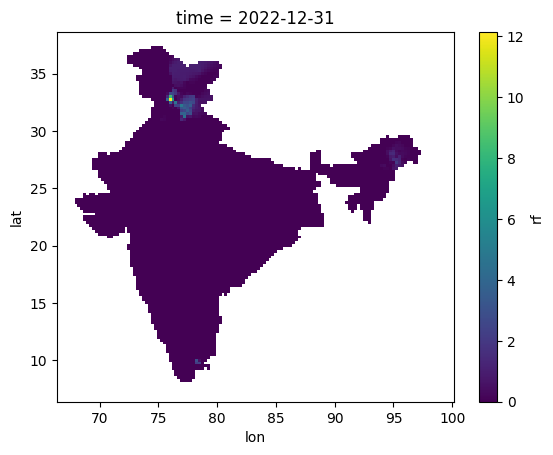

In [ ]:
ds_imd.isel(time=-1).rf.plot()

<Axes: >

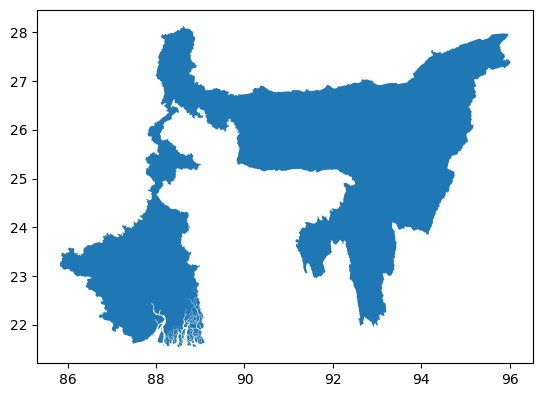

In [ ]:
import geopandas as gpd
gdf = gpd.read_file('Northeast.shp')
gdf.plot()

<Axes: >

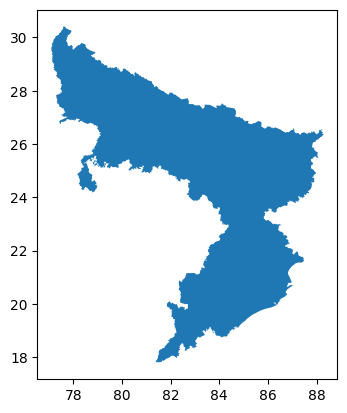

In [ ]:
gdf = gpd.read_file('Central_Northeast.shp')
gdf.plot()

<Axes: >

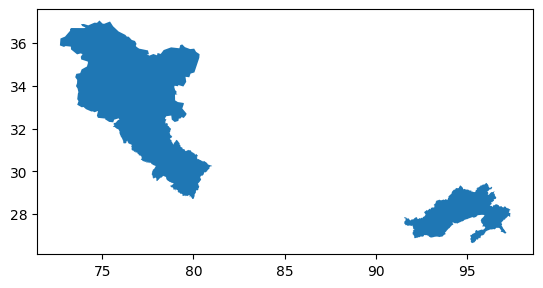

In [ ]:
gdf = gpd.read_file('Hilly_Regions.shp')
gdf.plot()

<Axes: >

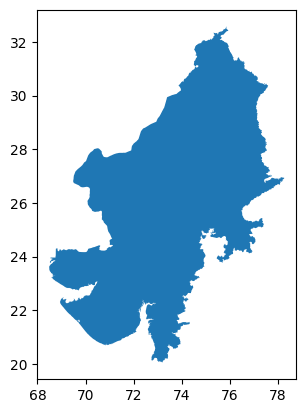

In [ ]:
gdf = gpd.read_file('Northwest.shp')
gdf.plot()

<Axes: >

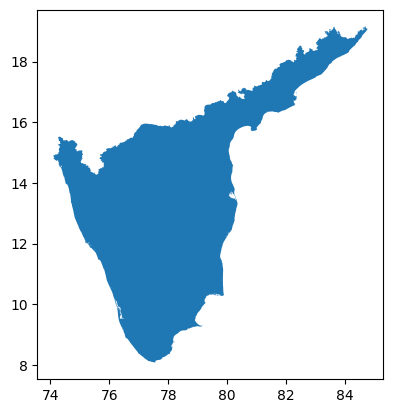

In [ ]:
gdf = gpd.read_file('South_Peninsular.shp')
gdf.plot()

In [ ]:
gdf = gpd.read_file('West_Central.shp')
gdf.plot()

NameError: ignored

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
import numpy as np

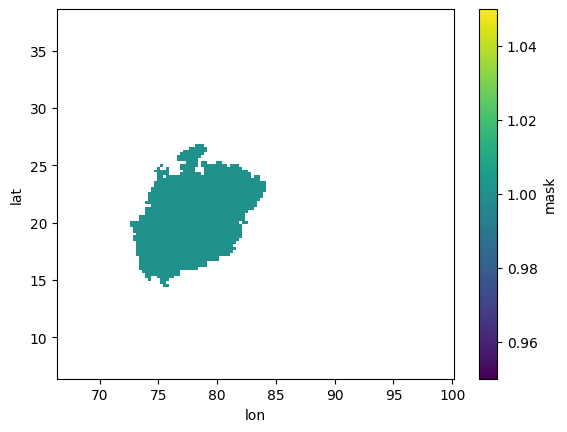

In [ ]:
mask = ds_imd.rf.values[0,:,:]
mask_ = np.zeros_like(mask)
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        point = Point(ds_imd.lon.values[j], ds_imd.lat.values[i])
        contains = gdf['geometry'].apply(lambda polygon: polygon.contains(point))

        # If any of the polygons contain the point, 'contains' will contain at least one True
        if contains.any():
            #print('The point is in the shapefile.')
            mask_[i,j] = 1.0
        else:
            #print('The point is not in the shapefile.')
            mask_[i,j] = np.nan
ds_imd['mask'] = (('lat', 'lon'), mask_)
ds_imd.mask.plot()

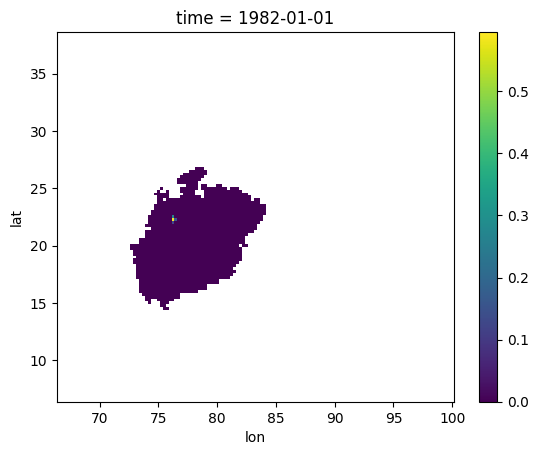

In [ ]:
masked_da = ds_imd.rf * ds_imd.mask
masked_da.isel(time=0).plot()

In [ ]:
# Inputs are dataarray and shapefile name
def mask_xarray(ds, shapefile):
    gdf = gpd.read_file(shapefile)
    mask = ds.values[0,:,:]
    mask_ = np.zeros_like(mask)
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            point = Point(ds.lon.values[j], ds.lat.values[i])
            contains = gdf['geometry'].apply(lambda polygon: polygon.contains(point))

            # If any of the polygons contain the point, 'contains' will contain at least one True
            if contains.any():
                #print('The point is in the shapefile.')
                mask_[i,j] = 1.0
            else:
                #print('The point is not in the shapefile.')
                mask_[i,j] = np.nan
    ds['mask'] = (('lat', 'lon'), mask_)
    masked_da = ds * ds.mask
    return masked_da

In [ ]:
ds_imd_west_central = mask_xarray(ds_imd.rf, 'West_Central.shp')
ds_imd_south_peninsular = mask_xarray(ds_imd.rf, 'South_Peninsular.shp')
ds_imd_northwest = mask_xarray(ds_imd.rf, 'Northwest.shp')
ds_imd_hilly = mask_xarray(ds_imd.rf, 'Hilly_Regions.shp')
ds_imd_central_northeast = mask_xarray(ds_imd.rf, 'Central_Northeast.shp')
ds_imd_northeast = mask_xarray(ds_imd.rf, 'Northeast.shp')

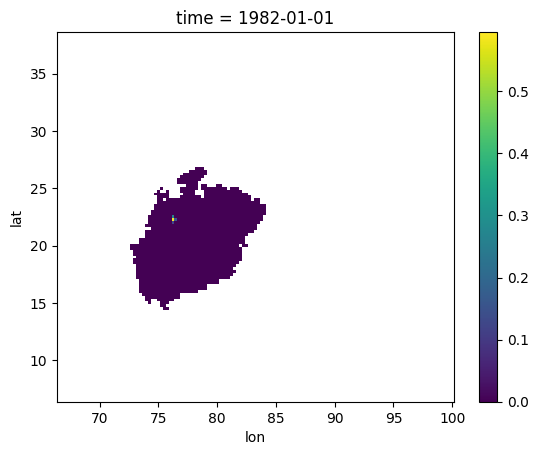

In [ ]:
ds_imd_west_central.isel(time=0).plot()

In [ ]:
ds_imd['rf_west_central'] = (('time', 'lat', 'lon'), ds_imd_west_central.values)
ds_imd['rf_south_peninsular'] = (('time', 'lat', 'lon'), ds_imd_south_peninsular.values)
ds_imd['rf_northwest'] = (('time', 'lat', 'lon'), ds_imd_northwest.values)
ds_imd['rf_hilly'] = (('time', 'lat', 'lon'), ds_imd_hilly.values)
ds_imd['rf_central_northeast'] = (('time', 'lat', 'lon'), ds_imd_central_northeast.values)
ds_imd['rf_northeast'] = (('time', 'lat', 'lon'), ds_imd_northeast.values)

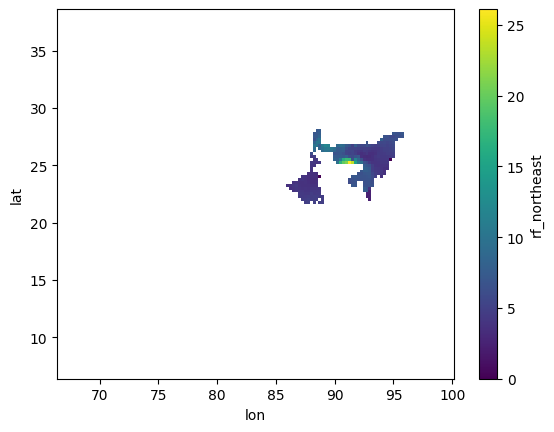

In [ ]:
ds_imd.rf_northeast.mean(dim='time').plot()

In [ ]:
# ds_imd.to_netcdf('imd_rf_1982_2022_homogenous_regions.nc')

In [ ]:
ds_imd.rf_northeast.to_netcdf('imd_rf_1982_2022_northeast.nc')

In [ ]:
!cp imd_rf_1982_2022_northeast.nc /content/drive/MyDrive/imd_gridded/

In [ ]:
ds_imd.rf_south_peninsular.to_netcdf('imd_rf_1982_2022_south_peninsular.nc')

In [ ]:
!cp imd_rf_1982_2022_south_peninsular.nc /content/drive/MyDrive/imd_gridded/

In [ ]:
ds_imd.rf_northwest.to_netcdf('imd_rf_1982_2022_northwest.nc')

In [ ]:
!cp imd_rf_1982_2022_northwest.nc /content/drive/MyDrive/imd_gridded/

In [ ]:
ds_imd.rf_hilly.to_netcdf('imd_rf_1982_2022_hilly.nc')

In [ ]:
!cp imd_rf_1982_2022_hilly.nc /content/drive/MyDrive/imd_gridded/

In [ ]:
ds_imd.rf_central_northeast.to_netcdf('imd_rf_1982_2022_central_northeast.nc')

In [ ]:
!cp imd_rf_1982_2022_central_northeast.nc /content/drive/MyDrive/imd_gridded/

In [ ]:
ds_imd.rf_west_central.to_netcdf('imd_rf_1982_2022_west_central.nc')

In [ ]:
!cp imd_rf_1982_2022_west_central.nc /content/drive/MyDrive/imd_gridded/